<a href="https://colab.research.google.com/github/rejina0914/Worksheet/blob/main/2461837_RejinaKarki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1 Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)
Objective:
Explore the HDI dataset for the latest available year (2022) to practice basic EDA techniques.
Tasks:
Complete all the Following Tasks:
1. Extract Latest Year:
• Identify unique years in the dataset.
• Filter the dataset to include only observations from the year 2022.
• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).


In [572]:
#Problem-1
#Problem-1A -Single Year HDI Exploration (Latest Year:2022)
#Task 1: Extract Latest Year
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Worksheet-2(AI)/Human_Development_Index_Dataset.csv',encoding="latin1")

last_zimbabwe_index = df[df["country"] == "Zimbabwe"].index.max()

df = df.loc[:last_zimbabwe_index]
# Identify unique years from the dataset
unique_years = df['year'].unique()
print("Unique Years in the Dataset:",unique_years)

# Filtered the dataset from only year (2022)
hdi_2022_df = df[df['year'] == 2022].copy()

Unique Years in the Dataset: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


2. Data Exploration:
• Display the first 10 rows of the 2022 dataset.
• Count the number of rows and columns.
• List all column names and their data types.

In [573]:
#Task-2 Data Exploration
import pandas as pd

# The first 10 rows of the 2022 dataset
hdi_2022_10_rows = hdi_2022_df.head(10)
print("First 10 Rows of the 2022 Dataset:")
print(hdi_2022_10_rows)

#Counting the number of rows and columns
hdi_num_rows , hdi_num_columns= hdi_2022_df.shape
print(f"Number of rows:{hdi_num_rows}")
print(f"Number of columns:{hdi_num_columns}")

# Listing all the column name and their datatypes
hdi_columns_and_types = df.dtypes
print("\nColumn Names and their Data Types:")
print(hdi_columns_and_types)

First 10 Rows of the 2022 Dataset:
     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...   

3. Missing Values & Data Cleaning:
• Check for missing values in each column and report total counts.
• Inspect dataset for:
– numeric columns stored as text,
– inconsistent or misspelled country names,
– duplicate rows,
– special characters (e.g., “–”) representing missing data.
• Apply necessary cleaning steps:
– convert data types where needed,
– remove duplicates,
– handle missing values (drop or impute; justify your choice).

In [574]:
#Missing values and data cleaning:

import numpy as np
import pandas as pd
# Check for missing values in each column and report total counts
missing_values = hdi_2022_df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Total missing values
print("\nTotal missing values:", hdi_2022_df.isnull().sum().sum())

# numeric columns stored as text,
obj_col = hdi_2022_df.select_dtypes(include='object').columns
print("\nObject columns stored as text:", obj_col)

# inconsistent or misspelled country names,
hdi_2022_df['country'] = (hdi_2022_df['country'].astype(str).str.strip().str.title())

# Check duplicate rows
duplicate_count = hdi_2022_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)

# Special characters representing missing data
# Missing or null values
missing_chars = ['-', '–', '—', 'NA', 'n/a', 'N/A', '', ' ']
total_nan = hdi_2022_df.isna().sum().sum()
print("Total missing values:", total_nan)

# handling missing values after dropping.
hdi_2022_df_clean = hdi_2022_df.dropna()

# Final check after cleaning
print("\nMissing values after cleaning:")
print(hdi_2022_df_clean.isnull().sum())



Missing Values in Each Column:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: in

First, the missing values of the dataset were checked by counting the number of null entries in each column and then by calculating the total number of missing values. Object-type columns were checked for numeric data encoded as text; country names were cleaned to remove irrelevant whitespace and to normalize capitalization to resolve inconsistencies in country names or spelling variations. The dataset was further checked for duplicate rows to ensure that each country presentation occurred once. Special characters such as "-", “NA,” and blank strings were treated as missing values and added to the cleaning process. After these issues were identified, the missing values were cleaned by removing rows containing null entries; this was appropriate since HDI analysis requires complete records for proper comparison between countries. A verification at the end ensured that the cleaned dataset had no missing values and was consistent, reliable, and ready for further analysis.

4. Basic Statistics:
• Compute the mean, median, and standard deviation of HDI for the year 2022.
• Identify the country with the highest HDI in 2022.
• Identify the country with the lowest HDI in 2022.


In [575]:
# Calculate basic statistics for HDI (2022)

# Computing mean, median, and standard deviation of HDI for year 2022
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

print("Mean of year 2022:", mean_hdi)
print("Median of year 2022:", median_hdi)
print("Standard deviation of year 2022:", std_hdi)

# Country with highest HDI in 2022
highest_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), 'country']
print("Country with highest HDI in year 2022:", highest_country)

# Country with lowest HDI in 2022
lowest_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), 'country']
print("Country with lowest HDI in year 2022:", lowest_country)


Mean of year 2022: 0.7237409326424872
Median of year 2022: 0.74
Standard deviation of year 2022: 0.15517730193086332
Country with highest HDI in year 2022: Switzerland
Country with lowest HDI in year 2022: Somalia


5. Filtering and Sorting:
• Filter countries with HDI {"hdi"} greater than 0.800.
• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.
• Display the top 10 countries.

In [576]:
# Filter countries with HDI > 0.800
filtered_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].copy()

# Sort by GNI per Capita (descending)
sorted_df = filtered_df.sort_values(by='gross_inc_percap', ascending=False)

# Display top 10 countries
top_10 = sorted_df.head(10)
print(top_10[['country', 'hdi', 'gross_inc_percap']])


                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (Sar)  0.956       62485.50516


6. Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):
HDI Category HDI Range (hdi)
Low < 0.550
Medium 0.550 – 0.699
High 0.700 – 0.799
Very ≥ 0.800
After creating this new column:
• verify that all countries are classified correctly,
• ensure the updated dataframe includes the new category column.
• Save the final dataframe as HDI category added.csv and include this file in your final
submission.

In [577]:
def hdi_Category(hdi):
    if hdi < 0.550:
        return 'Low'
    elif hdi <= 0.699:
        return 'Medium'
    elif hdi <= 0.799:
        return 'High'
    else:
        return 'Very'

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(hdi_Category)

# Verify that new column exists
print("Columns in datset",hdi_2022_df.columns)

# Verify that all countries are classified correctly
print(hdi_2022_df['HDI_Category'].value_counts())

# Check first few rows
print("Updated dataset:")
print(hdi_2022_df[['country', 'hdi', 'HDI_Category']].head(10))

# Save to CSV
hdi_2022_df.to_csv('HDI_category_added.csv', index=False)


Columns in datset Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons', 'HDI_Category'],
      dtype='object')
HDI_Category
Very      71
High      49
Medium    42
Low       33
Name: count, dtype: int64
Updated dataset:
                 country    hdi HDI_Category
32           Afghanistan  0.462          Low
65               Albania  0.789         High
98               Algeria  0.745         High
131         

3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)
Objective:
Analyze multi-year HDI patterns (2020, 2021, and 2022) to explore temporal changes, regional differences,
and trends across countries.
Tasks:
Complete all the Following Tasks:
1. Data Extraction and Saving:
• Filter the dataset to include only the years 2020, 2021, and 2022.
• Save the filtered dataset as HDI problem1B.csv.
• Use this cleaned dataset for all subsequent tasks in Problem 1B.

In [578]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Worksheet-2(AI)/Human_Development_Index_Dataset.csv',encoding="latin1")

# Filter dataset for the years 2020, 2021, and 2022
hdi_2020_2022_df = df[df['year'].isin([2020, 2021, 2022])].copy()

# Save the filtered dataset as HDI problem1B.csv
hdi_2020_2022_df.to_csv('HDI_problem1B.csv', index=False)
print("Filtered HDI Data of 2020,2021 and 2022:")
print(hdi_2020_2022_df.head())


Filtered HDI Data of 2020,2021 and 2022:
    Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
30          31  AFG  Afghanistan  2020  0.488           62.575     38.972231   
31          32  AFG  Afghanistan  2021  0.473           61.982     40.099462   
32          33  AFG  Afghanistan  2022  0.462           62.879     41.128771   
63          64  ALB      Albania  2020  0.784           76.989      2.866849   
64          65  ALB      Albania  2021  0.785           76.463      2.854710   

       hdi_f     hdi_m  life_expec_f  ...  gender_development  \
30  0.381373  0.548741        65.432  ...               0.695   
31  0.379129  0.528559        65.279  ...               0.717   
32  0.332443  0.534145        66.213  ...               0.622   
63  0.775404  0.793220        79.676  ...               0.978   
64  0.777866  0.792942        79.173  ...               0.981   

    gender_inequality  secondary_education_f_%  secondary_education_m_%  \
30          

2. Data Cleaning:

• Check for missing values in the following essential columns:

– hdi

– country

– year

• Identify and address the following issues:

– missing or null values,

– inconsistent or misspelled country names,

– duplicate rows,

– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).

• Apply and justify cleaning steps, including:

– handling missing values (dropping or imputing),

– converting data types appropriately,

– removing duplicate entries,

– ensuring consistent naming conventions for countries and years.

• All cleaning decisions must be clearly justified in the final report.

In [579]:
import numpy as np
import pandas as pd

# Checking missing values in essential columns
cols_to_check = ["hdi", "country", "year"]
missing_values_in_cols = hdi_2020_2022_df[cols_to_check].isnull().sum()
print("Missing values in essential columns:")
print(missing_values_in_cols)

#Check missing or null values
# Drop rows with missing country, year, or HDI
hdi_2020_2022_df.dropna(subset=['hdi', 'country', 'year'], inplace=True)


# Fix inconsistent or misspelled country names
hdi_2020_2022_df['country'] = hdi_2020_2022_df['country'].str.strip().str.title()

# Convert numeric columns stored as text
numeric_cols = ['hdi', 'year']

for col in numeric_cols:
    hdi_2020_2022_df[col] = pd.to_numeric(
        hdi_2020_2022_df[col],
        errors='coerce'
    )

# Check count of missing values after conversion
print("\nMissing values after conversion and symbol replacement:")
print(hdi_2020_2022_df.isnull().sum())

# Remove rows where conversion caused NaN
hdi_2020_2022_df.dropna(subset=cols_to_check, inplace=True)

# Check duplicate rows
print(hdi_2020_2022_df.duplicated().sum())
print("\nNumber of duplicate rows:,", duplicate_count)

# Remove duplicates
hdi_2020_2022_df.drop_duplicates(inplace=True)

# Final check after cleaning
print("\nMissing values after cleaning:")
print(hdi_2020_2022_df.isnull().sum())


Missing values in essential columns:
hdi        8
country    0
year       0
dtype: int64

Missing values after conversion and symbol replacement:
Unnamed: 0                     0
iso3                           0
country                        0
year                           0
hdi                            0
life_expectancy                0
pop_millions                   0
hdi_f                         33
hdi_m                         33
life_expec_f                   0
life_expec_m                   0
expec_yr_school                0
expec_yr_school_f              0
expec_yr_school_m              0
mean_yr_school                 0
mean_yr_school_f               0
mean_yr_school_m               0
gross_inc_percap               0
gross_inc_percap_f            33
gross_inc_percap_m            33
gender_development            33
gender_inequality             81
secondary_education_f_%       45
secondary_education_m_%       45
seats_in_parliament_f_%        6
seats_in_parliament_m_%      

3. Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):
– Select any five countries (or five countries from a region of your choice).
– Plot HDI values for each country across the years 2020, 2021, and 2022.
– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.


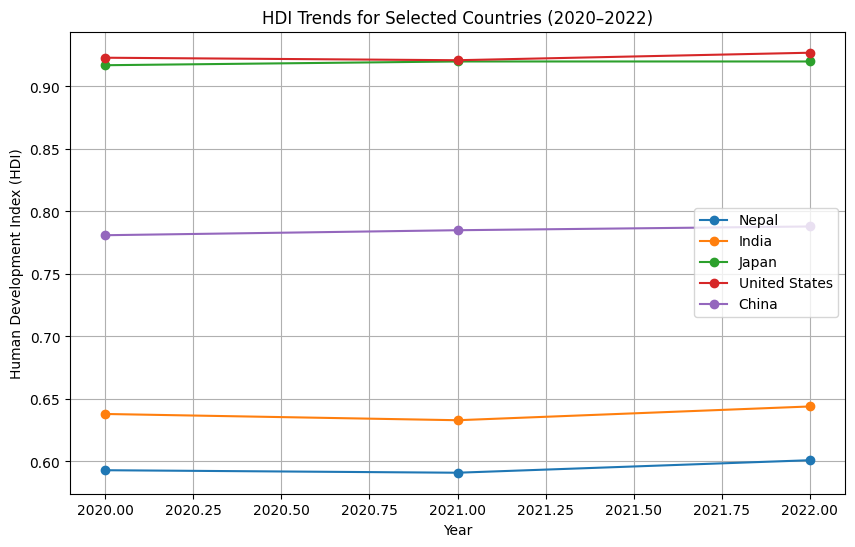

In [580]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecting five countries
countries = ['Nepal', 'India', 'Japan', 'United States', 'China']

# Filtering data for selected countries
country_hdi_df = hdi_2020_2022_df[hdi_2020_2022_df['country'].isin(countries)]

# line chart
plt.figure(figsize=(10,6))
for country in countries:
    country_data = country_hdi_df[country_hdi_df['country'] == country].sort_values('year')
    plt.plot(country_data['year'], country_data['hdi'], marker='o', label=country)

# labels and title
plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")
plt.title("HDI Trends for Selected Countries (2020–2022)")

# legend
plt.legend()

# Grid
plt.grid(True)

plt.savefig("linegraph.png")

# Displaying plot
plt.show()


B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)
∗ Group the dataset by Region and Year.
∗ Compute the mean HDI for each region-year pair.
∗ Plot a bar chart comparing average HDI across regions for each year.
∗ Label axes clearly and include a descriptive title.


In [581]:
region_map = {

    # East Asia & Pacific
    "Australia": "East Asia & Pacific",
    "Brunei Darussalam": "East Asia & Pacific",
    "Cambodia": "East Asia & Pacific",
    "China": "East Asia & Pacific",
    "Fiji": "East Asia & Pacific",
    "Indonesia": "East Asia & Pacific",
    "Japan": "East Asia & Pacific",
    "Kiribati": "East Asia & Pacific",
    "Korea (Republic Of)": "East Asia & Pacific",
    "Lao People'S Democratic Republic": "East Asia & Pacific",
    "Malaysia": "East Asia & Pacific",
    "Marshall Islands": "East Asia & Pacific",
    "Micronesia, Fed. Sts.": "East Asia & Pacific",
    "Mongolia": "East Asia & Pacific",
    "Myanmar": "East Asia & Pacific",
    "Nauru": "East Asia & Pacific",
    "New Zealand": "East Asia & Pacific",
    "Palau": "East Asia & Pacific",
    "Papua New Guinea": "East Asia & Pacific",
    "Philippines": "East Asia & Pacific",
    "Samoa": "East Asia & Pacific",
    "Singapore": "East Asia & Pacific",
    "Solomon Islands": "East Asia & Pacific",
    "Thailand": "East Asia & Pacific",
    "Timor-Leste": "East Asia & Pacific",
    "Tonga": "East Asia & Pacific",
    "Tuvalu": "East Asia & Pacific",
    "Vanuatu": "East Asia & Pacific",
    "Viet Nam": "East Asia & Pacific",

    # Europe & Central Asia
    "Albania": "Europe & Central Asia",
    "Armenia": "Europe & Central Asia",
    "Austria": "Europe & Central Asia",
    "Azerbaijan": "Europe & Central Asia",
    "Belarus": "Europe & Central Asia",
    "Belgium": "Europe & Central Asia",
    "Bosnia And Herzegovina": "Europe & Central Asia",
    "Bulgaria": "Europe & Central Asia",
    "Croatia": "Europe & Central Asia",
    "Cyprus": "Europe & Central Asia",
    "Czechia": "Europe & Central Asia",
    "Denmark": "Europe & Central Asia",
    "Estonia": "Europe & Central Asia",
    "Finland": "Europe & Central Asia",
    "France": "Europe & Central Asia",
    "Georgia": "Europe & Central Asia",
    "Germany": "Europe & Central Asia",
    "Greece": "Europe & Central Asia",
    "Hungary": "Europe & Central Asia",
    "Iceland": "Europe & Central Asia",
    "Ireland": "Europe & Central Asia",
    "Italy": "Europe & Central Asia",
    "Kazakhstan": "Europe & Central Asia",
    "Kyrgyzstan": "Europe & Central Asia",
    "Latvia": "Europe & Central Asia",
    "Lithuania": "Europe & Central Asia",
    "Luxembourg": "Europe & Central Asia",
    "Malta": "Europe & Central Asia",
    "Moldova (Republic Of)": "Europe & Central Asia",
    "Netherlands": "Europe & Central Asia",
    "North Macedonia": "Europe & Central Asia",
    "Norway": "Europe & Central Asia",
    "Poland": "Europe & Central Asia",
    "Portugal": "Europe & Central Asia",
    "Romania": "Europe & Central Asia",
    "Russian Federation": "Europe & Central Asia",
    "Serbia": "Europe & Central Asia",
    "Slovak Republic": "Europe & Central Asia",
    "Slovenia": "Europe & Central Asia",
    "Spain": "Europe & Central Asia",
    "Sweden": "Europe & Central Asia",
    "Switzerland": "Europe & Central Asia",
    "Türkiye": "Europe & Central Asia",
    "Tajikistan": "Europe & Central Asia",
    "Ukraine": "Europe & Central Asia",
    "United Kingdom": "Europe & Central Asia",
    "Uzbekistan": "Europe & Central Asia",

    # Latin America & Caribbean
    "Argentina": "Latin America & Caribbean",
    "Bahamas": "Latin America & Caribbean",
    "Barbados": "Latin America & Caribbean",
    "Belize": "Latin America & Caribbean",
    "Bolivia (Plurinational State Of)": "Latin America & Caribbean",
    "Brazil": "Latin America & Caribbean",
    "Chile": "Latin America & Caribbean",
    "Colombia": "Latin America & Caribbean",
    "Costa Rica": "Latin America & Caribbean",
    "Cuba": "Latin America & Caribbean",
    "Dominican Republic": "Latin America & Caribbean",
    "Ecuador": "Latin America & Caribbean",
    "El Salvador": "Latin America & Caribbean",
    "Guatemala": "Latin America & Caribbean",
    "Guyana": "Latin America & Caribbean",
    "Haiti": "Latin America & Caribbean",
    "Honduras": "Latin America & Caribbean",
    "Jamaica": "Latin America & Caribbean",
    "Mexico": "Latin America & Caribbean",
    "Nicaragua": "Latin America & Caribbean",
    "Panama": "Latin America & Caribbean",
    "Paraguay": "Latin America & Caribbean",
    "Peru": "Latin America & Caribbean",
    "Suriname": "Latin America & Caribbean",
    "Trinidad and Tobago": "Latin America & Caribbean",
    "Uruguay": "Latin America & Caribbean",
    "Venezuela (Bolivarian Republic Of)": "Latin America & Caribbean",

    # Middle East & North Africa
    "Algeria": "Middle East & North Africa",
    "Bahrain": "Middle East & North Africa",
    "Egypt": "Middle East & North Africa",
    "Iran (Islamic Republic Of)": "Middle East & North Africa",
    "Iraq": "Middle East & North Africa",
    "Israel": "Middle East & North Africa",
    "Jordan": "Middle East & North Africa",
    "Kuwait": "Middle East & North Africa",
    "Lebanon": "Middle East & North Africa",
    "Libya": "Middle East & North Africa",
    "Morocco": "Middle East & North Africa",
    "Oman": "Middle East & North Africa",
    "Qatar": "Middle East & North Africa",
    "Saudi Arabia": "Middle East & North Africa",
    "Tunisia": "Middle East & North Africa",
    "United Arab Emirates": "Middle East & North Africa",
    "Yemen": "Middle East & North Africa",

    # North America
    "Canada": "North America",
    "United States": "North America",

    # South Asia
    "Afghanistan": "South Asia",
    "Bangladesh": "South Asia",
    "Bhutan": "South Asia",
    "India": "South Asia",
    "Maldives": "South Asia",
    "Nepal": "South Asia",
    "Pakistan": "South Asia",
    "Sri Lanka": "South Asia",

    # Sub-Saharan Africa
    "Angola": "Sub-Saharan Africa",
    "Benin": "Sub-Saharan Africa",
    "Botswana": "Sub-Saharan Africa",
    "Burkina Faso": "Sub-Saharan Africa",
    "Burundi": "Sub-Saharan Africa",
    "Cameroon": "Sub-Saharan Africa",
    "Central African Republic": "Sub-Saharan Africa",
    "Chad": "Sub-Saharan Africa",
    "Congo (Democratic Republic Of The)": "Sub-Saharan Africa",
    "Congo": "Sub-Saharan Africa",
    "Côte d’Ivoire": "Sub-Saharan Africa",
    "Ethiopia": "Sub-Saharan Africa",
    "Gabon": "Sub-Saharan Africa",
    "Gambia": "Sub-Saharan Africa",
    "Ghana": "Sub-Saharan Africa",
    "Guinea": "Sub-Saharan Africa",
    "Kenya": "Sub-Saharan Africa",
    "Liberia": "Sub-Saharan Africa",
    "Madagascar": "Sub-Saharan Africa",
    "Malawi": "Sub-Saharan Africa",
    "Mauritania": "Sub-Saharan Africa",
    "Mali": "Sub-Saharan Africa",
    "Mozambique": "Sub-Saharan Africa",
    "Namibia": "Sub-Saharan Africa",
    "Niger": "Sub-Saharan Africa",
    "Nigeria": "Sub-Saharan Africa",
    "Rwanda": "Sub-Saharan Africa",
    "Senegal": "Sub-Saharan Africa",
    "Slovakia":"Sub-Saharan Africa",
    "Sierra Leone": "Sub-Saharan Africa",
    "Sudan": "Sub-Saharan Africa",
    "South Africa": "Sub-Saharan Africa",
    "Somalia": "Sub-Saharan Africa",
    "South Sudan": "Sub-Saharan Africa",
    "Tanzania (United Republic Of)": "Sub-Saharan Africa",
    "Togo": "Sub-Saharan Africa",
    "Tanzania": "Sub-Saharan Africa",
    "Uganda": "Sub-Saharan Africa",
    "Zambia": "Sub-Saharan Africa",
    "Zimbabwe": "Sub-Saharan Africa"
}
hdi_2020_2022_df['Region'] = hdi_2020_2022_df['country'].map(region_map)

# Check the first few rows
hdi_2020_2022_df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Region
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554,South Asia
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351,South Asia
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,South Asia
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,...,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704,Europe & Central Asia
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,...,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865,Europe & Central Asia


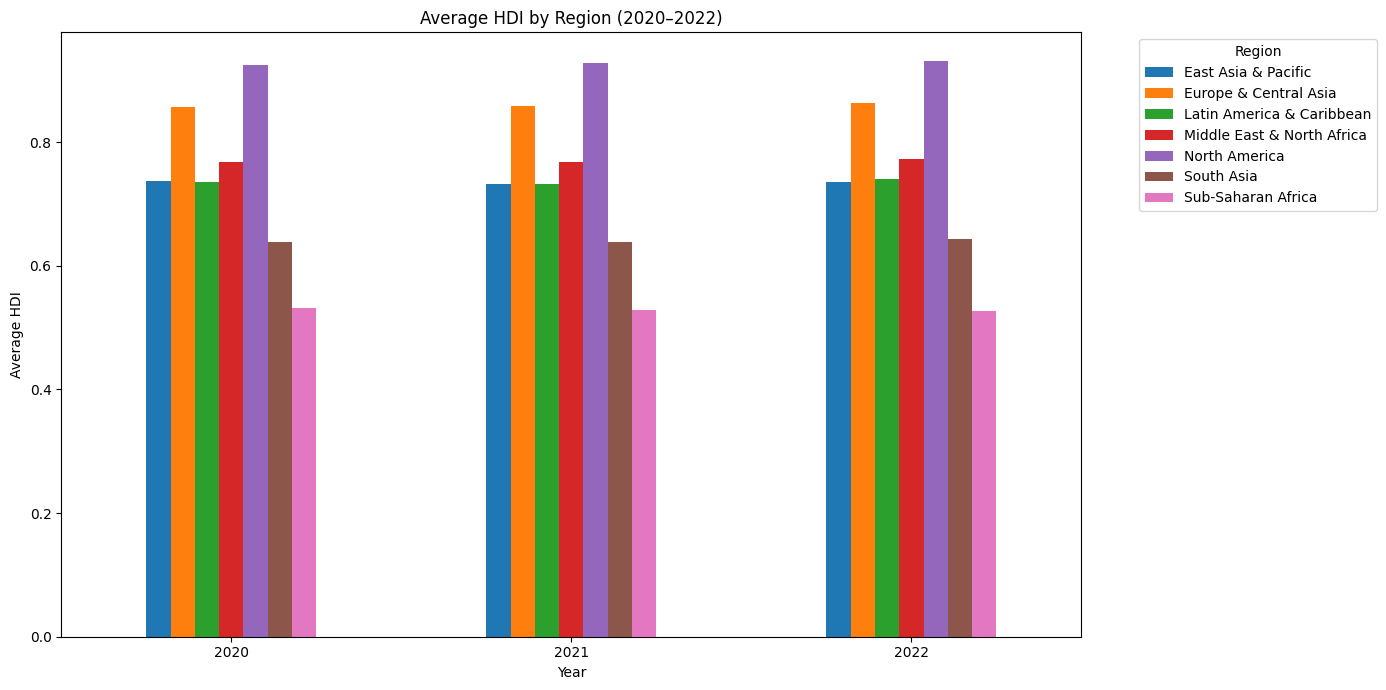

In [582]:
import matplotlib.pyplot as plt

# Group by Year and Region, calculate mean HDI
avg_region_year = hdi_2020_2022_df.groupby(['year', 'Region'])['hdi'].mean().unstack()

# Plot grouped bar chart
avg_region_year.plot(kind='bar', figsize=(14,7))
plt.ylabel("Average HDI")
plt.xlabel("Year")
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=0)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1))  # place legend outside
plt.tight_layout()
plt.savefig("bargraph.png")
plt.show()

Box Plot: HDI Distribution for 2020, 2021, and 2022
∗ Filter the dataset for the years 2020, 2021, and 2022.
∗ Create a box plot showing HDI spread for each of the three years.
∗ Include titles and axis labels.
∗ Comment briefly on distribution differences

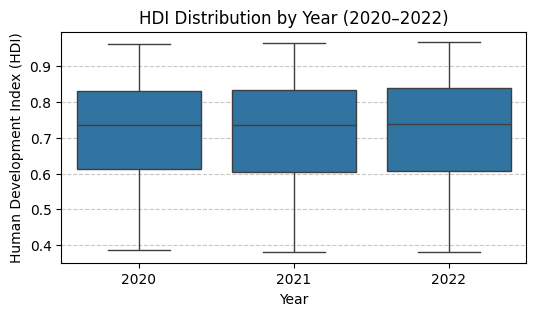

In [583]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset for years 2020, 2021, 2022
hdi_years_df = hdi_2020_2022_df[hdi_2020_2022_df['year'].isin([2020, 2021, 2022])]

# Create box plot
plt.figure(figsize=(6,3))
sns.boxplot(x='year', y='hdi', data=hdi_years_df)

# Labels and title
plt.title("HDI Distribution by Year (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("boxplot.png")
plt.show()

 Scatter Plot: HDI vs. GNI per Capita
∗ Check if the dataset contains a column for GNI per Capita.
∗ If available:
· Create a scatter plot using HDI as the dependent variable.
· Use GNI per Capita on the x-axis.
· Add a regression line (optional).
∗ If the variable is missing, write:
"GNI per Capita variable not available in the dataset."
• Provide brief interpretations of all visualizations, describing major trends, patterns, and anomalies.

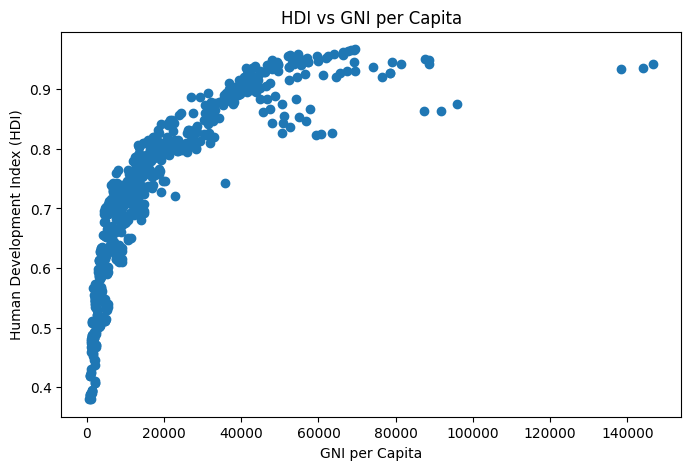

In [584]:
import matplotlib.pyplot as plt
import pandas as pd

# Check if GNI per Capita column exists
if 'gross_inc_percap' in hdi_2020_2022_df.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(
        hdi_2020_2022_df['gross_inc_percap'],
        hdi_2020_2022_df['hdi']
    )
    plt.xlabel("GNI per Capita")
    plt.ylabel("Human Development Index (HDI)")
    plt.title("HDI vs GNI per Capita")
    plt.savefig("scatterplot.png")
    plt.show()

else:
    print("GNI per Capita variable not available in the dataset.")

Ans:The graph brings out that while the relationship between GNI per Capita and HDI is positive but nonlinear; countries with lower income record significant advances in their HDI as their income increases while countries with higher income record declining advances in HDI as income increases. A few countries stand out as outliers with exceptionally high GNI but only marginally higher HDI, suggesting that beyond a certain income level, further economic growth contributes less to overall human development.

4. Short Analysis Questions:



1. Which countries show the greatest improvement in HDI from 2020 to 2022?

ans:Countries such as (Andorra,Azerbaijan,Ecuador)and many other countries show the greatest improvement in HDI from 2020 to 2022.

In [585]:
hdi_2020 = hdi_2020_2022_df[hdi_2020_2022_df['year'] == 2020]
hdi_2022 = hdi_2020_2022_df[hdi_2020_2022_df['year'] == 2022]
hdi_change = hdi_2020[['country','hdi']].merge(
    hdi_2022[['country','hdi']],
    on='country',
    suffixes=('_2020', '_2022')
)
hdi_change['hdi_improvement'] = hdi_change['hdi_2022'] - hdi_change['hdi_2020']

top_improvement = hdi_change.sort_values(
    by='hdi_improvement',
    ascending=False
)

print(top_improvement.head(10))

        country  hdi_2020  hdi_2022  hdi_improvement
3       Andorra     0.843     0.884            0.041
10   Azerbaijan     0.722     0.760            0.038
50      Ecuador     0.734     0.765            0.031
105    Maldives     0.737     0.762            0.025
111      Mexico     0.757     0.781            0.024
148  San Marino     0.844     0.867            0.023
168  Tajikistan     0.656     0.679            0.023
11      Bahamas     0.798     0.820            0.022
91       Kuwait     0.826     0.847            0.021
176     Türkiye     0.835     0.855            0.020


2.  Did any countries experience a decline in HDI? Provide possible reasons.

ans:Yes, multiple countries including Timor-Leste, Ukraine, and Afghanistan experience HDI declines from 2020 to 2022.Possible reasons are due to poor education, loss gross income per capital and poor life expendency.

In [586]:
hdi_2020 = hdi_2020_2022_df[hdi_2020_2022_df['year'] == 2020]
hdi_2022 = hdi_2020_2022_df[hdi_2020_2022_df['year'] == 2022]
hdi_change = hdi_2020[['country','hdi']].merge(
    hdi_2022[['country','hdi']],
    on='country',
    suffixes=('_2020', '_2022')
)
hdi_change['hdi_decline'] = hdi_change['hdi_2022'] - hdi_change['hdi_2020']

top_improvement = hdi_change.sort_values(
    by='hdi_decline',
    ascending=True
)

print(top_improvement.head(10))

                              country  hdi_2020  hdi_2022  hdi_decline
171                       Timor-Leste     0.633     0.566       -0.067
180                           Ukraine     0.762     0.734       -0.028
0                         Afghanistan     0.488     0.462       -0.026
119                           Namibia     0.634     0.610       -0.024
95                            Lebanon     0.742     0.723       -0.019
146  Saint Vincent And The Grenadines     0.785     0.772       -0.013
164                          Suriname     0.702     0.690       -0.012
56              Eswatini (Kingdom Of)     0.622     0.610       -0.012
61                              Gabon     0.704     0.693       -0.011
135                          Paraguay     0.742     0.731       -0.011


3.Which region has the highest and lowest average HDI across these three years?

ans:North America has the highest and Sub-Saharan Africa has the lowest average HDI across three years.

In [587]:
# Compute average HDI across 2020–2022 for each region
avg_hdi_region = hdi_2020_2022_df.groupby("Region")["hdi"].mean()

# Find region with highest and lowest average HDI
highest_region = avg_hdi_region.idxmax()
lowest_region = avg_hdi_region.idxmin()

print("Average HDI by Region (2020–2022):")
print(avg_hdi_region.round(3))

print("\nRegion with highest average HDI:", highest_region)
print("Region with lowest average HDI:", lowest_region)

Average HDI by Region (2020–2022):
Region
East Asia & Pacific           0.735
Europe & Central Asia         0.860
Latin America & Caribbean     0.736
Middle East & North Africa    0.770
North America                 0.928
South Asia                    0.640
Sub-Saharan Africa            0.529
Name: hdi, dtype: float64

Region with highest average HDI: North America
Region with lowest average HDI: Sub-Saharan Africa


• Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during this period.

ans:Global events such as the COVID-19 pandemic significantly disrupted HDI trends, especially during 2020–2022. The pandemic has affected the health system and caused economic slowdowns that have impacted the HDI Trends.


Problem 2
Advanced HDI Exploration
Tasks:
Complete all the following tasks:
1. Create South Asia Subset:
• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
• Filter the HDI dataset to include only these countries.
• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.


In [588]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Worksheet-2(AI)/Human_Development_Index_Dataset.csv',encoding="latin1")

# Defining list of South Asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
hdi_south_asia_df = df[df['country'].isin(south_asia_countries)
]
hdi_south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)
print(hdi_south_asia_df)

      Unnamed: 0 iso3      country  year    hdi  life_expectancy  \
0              1  AFG  Afghanistan  1990  0.284           45.967   
1              2  AFG  Afghanistan  1991  0.292           46.663   
2              3  AFG  Afghanistan  1992  0.299           47.596   
3              4  AFG  Afghanistan  1993  0.307           51.466   
4              5  AFG  Afghanistan  1994  0.300           51.495   
...          ...  ...          ...   ...    ...              ...   
5473        5474  LKA    Sri Lanka  2018  0.774           75.748   
5474        5475  LKA    Sri Lanka  2019  0.775           76.008   
5475        5476  LKA    Sri Lanka  2020  0.777           76.393   
5476        5477  LKA    Sri Lanka  2021  0.783           76.399   
5477        5478  LKA    Sri Lanka  2022  0.780           76.610   

      pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
0        10.694796       NaN       NaN        48.397  ...                 NaN   
1        10.745167   

2. Composite Development Score:
• Create a new metric called Composite Score using the formula:
Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"• Rank South Asian countries based on Composite Score.
• Plot the top 5 countries in a horizontal bar chart.
• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.



Top 5 South Asian Countries by Composite Score in 1990s:
country
Maldives     3024.723773
Sri Lanka    1472.435534
Pakistan      965.657045
Bhutan        909.574292
India         636.883028
Name: Composite_Score, dtype: float64

Top 5 South Asian Countries by HDI in 1990s:
country
Sri Lanka     0.6670
Maldives      0.6058
India         0.4567
Bangladesh    0.4370
Nepal         0.4261
Name: hdi, dtype: float64


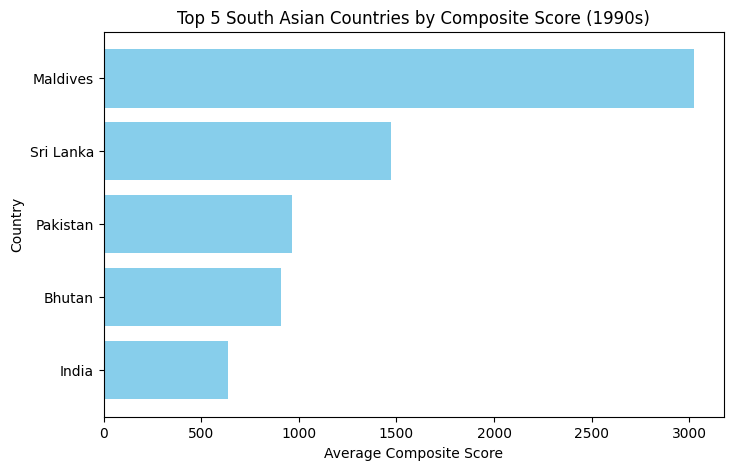


Top 5 South Asian Countries by Composite Score in 2000s:
country
Maldives     4273.809348
Sri Lanka    2137.544010
Bhutan       1626.280127
Pakistan     1112.312573
India         965.673484
Name: Composite_Score, dtype: float64

Top 5 South Asian Countries by HDI in 2000s:
country
Sri Lanka     0.7029
Maldives      0.6588
India         0.5265
Bangladesh    0.5193
Nepal         0.4903
Name: hdi, dtype: float64


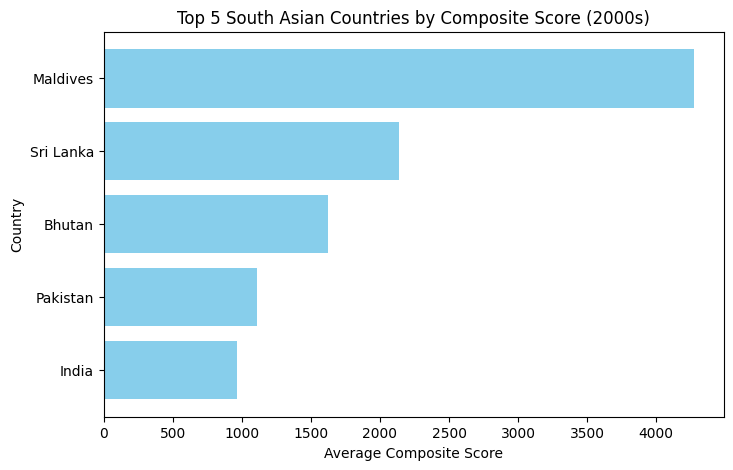


Top 5 South Asian Countries by Composite Score in 2010s:
country
Maldives      4962.203432
Sri Lanka     3518.317313
Bhutan        2733.270564
India         1602.444237
Bangladesh    1391.573452
Name: Composite_Score, dtype: float64

Top 5 South Asian Countries by HDI in 2010s:
country
Sri Lanka     0.7576
Maldives      0.7241
Bhutan        0.6216
India         0.6122
Bangladesh    0.5981
Name: hdi, dtype: float64


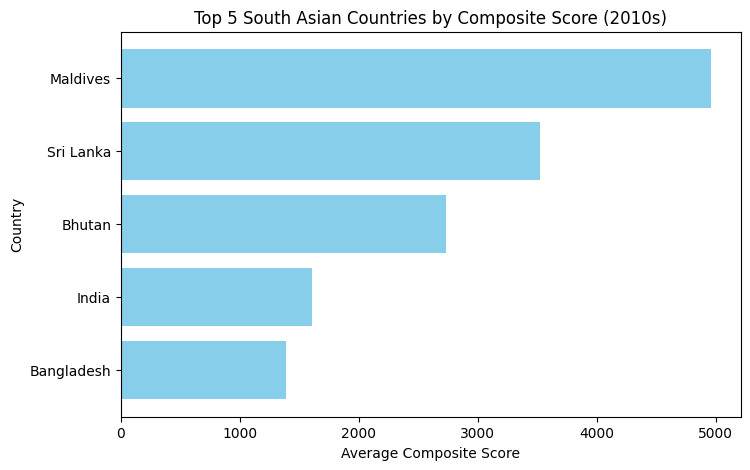


Top 5 South Asian Countries by Composite Score in 2020s:
country
Maldives      4827.657597
Sri Lanka     3767.752918
Bhutan        3097.787317
India         1978.776712
Bangladesh    1877.251264
Name: Composite_Score, dtype: float64

Top 5 South Asian Countries by HDI in 2020s:
country
Sri Lanka     0.780000
Maldives      0.750667
Bhutan        0.677667
Bangladesh    0.663000
India         0.638333
Name: hdi, dtype: float64


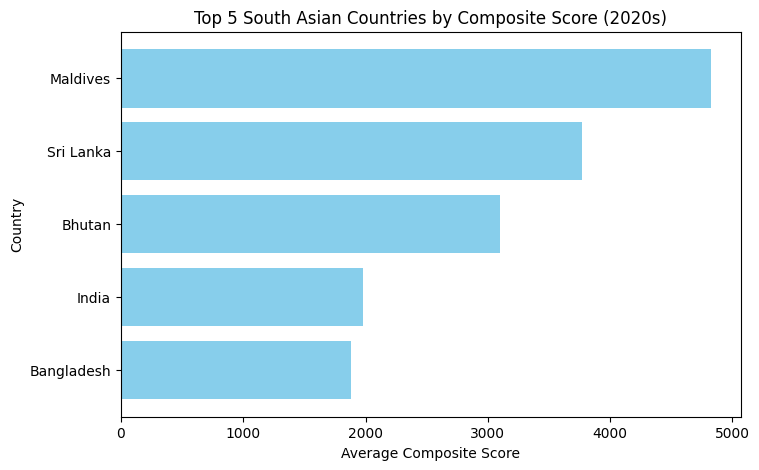

In [589]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the South Asia dataset
hdi_south_asia_df = pd.read_csv("/content/HDI_SouthAsia.csv")

# Compute Composite Score
hdi_south_asia_df["Composite_Score"] = (
    0.30 * hdi_south_asia_df["life_expectancy"] +
    0.30 * hdi_south_asia_df["gross_inc_percap"]
)

# Assign decades
def assign_decade(year):
    if 1990 <= year <= 1999:
        return "1990s"
    elif 2000 <= year <= 2009:
        return "2000s"
    elif 2010 <= year <= 2019:
        return "2010s"
    elif 2020 <= year <= 2022:
        return "2020s"
    else:
        return "Other"

hdi_south_asia_df["Decade"] = hdi_south_asia_df["year"].apply(assign_decade)

# Analyze by decade
decades = hdi_south_asia_df["Decade"].unique()
for decade in decades:
    df_decade = hdi_south_asia_df[hdi_south_asia_df["Decade"] == decade]

    # Compute average Composite Score per country in this decade
    avg_composite = df_decade.groupby("country")["Composite_Score"].mean().sort_values(ascending=False)
    avg_hdi = df_decade.groupby("country")["hdi"].mean().sort_values(ascending=False)

    print(f"\nTop 5 South Asian Countries by Composite Score in {decade}:")
    print(avg_composite.head(5))

    print(f"\nTop 5 South Asian Countries by HDI in {decade}:")
    print(avg_hdi.head(5))

    # Plot top 5 by Composite Score
    top5 = avg_composite.head(5)
    plt.figure(figsize=(8,5))
    plt.barh(top5.index, top5.values, color='skyblue')
    plt.xlabel("Average Composite Score")
    plt.ylabel("Country")
    plt.title(f"Top 5 South Asian Countries by Composite Score ({decade})")
    plt.gca().invert_yaxis()
    plt.savefig(f"bargraph{decade}.png")
    plt.show()


Ans:The Composite Score ranking is mostly influenced by income and life expectancy, so countries with higher income like Maldives rank higher. The HDI ranking also includes education, which helps countries like Sri Lanka rank better. Because of this difference, some countries rank higher in Composite Score due to income, while others rank higher in HDI because of better overall human development.

3. Outlier Detection:
• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
• Discuss why the identified countries stand out as outliers.


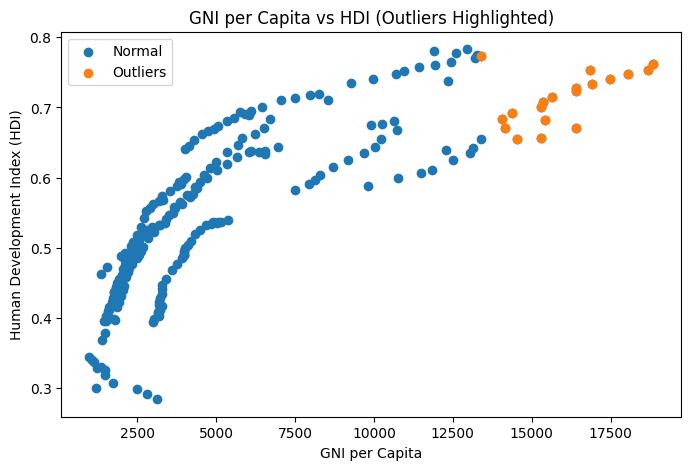

In [590]:
import matplotlib.pyplot as plt

df_outlier = hdi_south_asia_df.copy()

# Detecting HDI outliers
Q1_hdi = hdi_south_asia_df['hdi'].quantile(0.25)
Q3_hdi = hdi_south_asia_df['hdi'].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

# GNI per Capita outliers
Q1_gni = hdi_south_asia_df['gross_inc_percap'].quantile(0.25)
Q3_gni = hdi_south_asia_df['gross_inc_percap'].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

# Identifying the outliers
outliers_df = hdi_south_asia_df[
    (hdi_south_asia_df['hdi'] < Q1_hdi - 1.5 * IQR_hdi) |
    (hdi_south_asia_df['hdi'] > Q3_hdi + 1.5 * IQR_hdi) |
    (hdi_south_asia_df['gross_inc_percap'] < Q1_gni - 1.5 * IQR_gni) |
    (hdi_south_asia_df['gross_inc_percap'] > Q3_gni + 1.5 * IQR_gni)
]
# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(
    hdi_south_asia_df['gross_inc_percap'],
    hdi_south_asia_df['hdi'],
    label='Normal'
)
plt.scatter(
    outliers_df['gross_inc_percap'],
    outliers_df['hdi'],
    label='Outliers'
)
plt.xlabel("GNI per Capita")
plt.ylabel("Human Development Index (HDI)")
plt.title("GNI per Capita vs HDI (Outliers Highlighted)")
plt.legend()
plt.savefig("scatterplot2.png")
plt.show()

Ans:The identified countries stand out as outliers because their GNI per capita or HDI values are much higher or lower than most other South Asian countries. Countries with very high income levels show higher GNI compared to the rest, while some have unusually low or high HDI values. This makes them different from the general trend where HDI increases gradually with income, causing them to appear separately in the scatter plot.

4. Exploring Metric Relationships:
• Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).
• Compute Pearson correlation of each metric with HDI.
• Create scatter plots with trendlines to visualize the relationships.
• Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

Pearson Correlation of each metric with HDI:
life_expectancy       0.958761
gender_development    0.865621
Name: hdi, dtype: float64


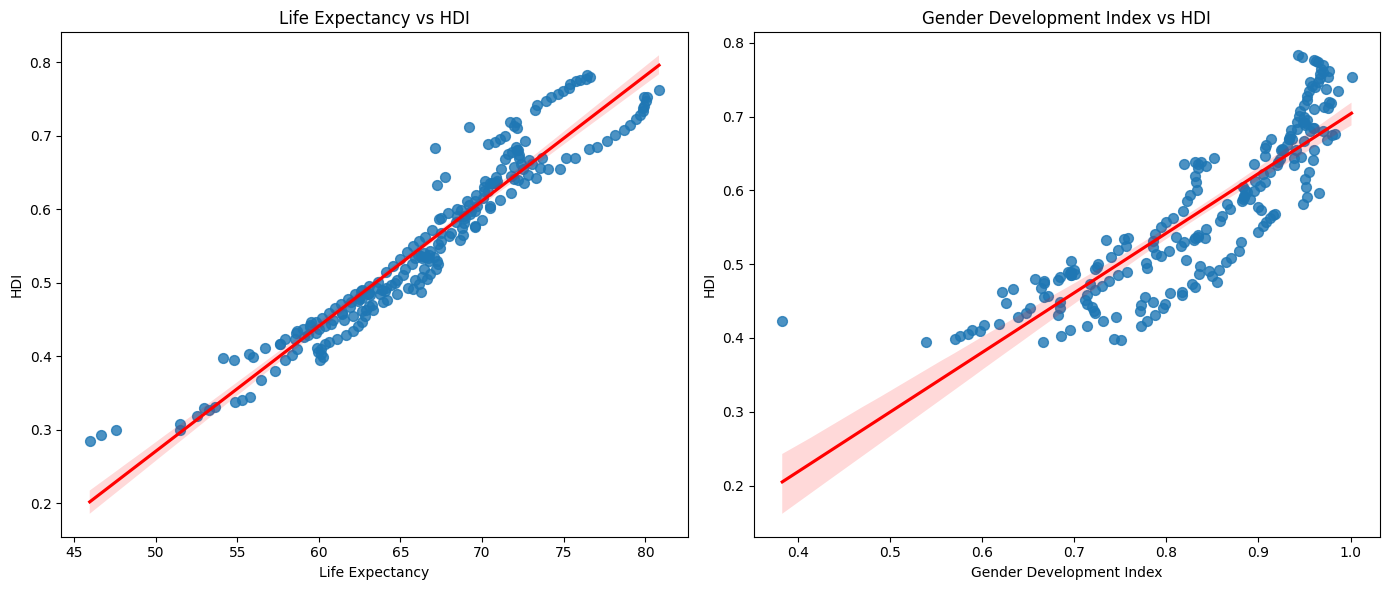

In [591]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["life_expectancy", "gender_development"]
correlations = hdi_south_asia_df[metrics + ["hdi"]].corr()["hdi"].drop("hdi")
print("Pearson Correlation of each metric with HDI:")
print(correlations)

# scatter plot
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.regplot(x="life_expectancy", y="hdi", data=hdi_south_asia_df, scatter_kws={"s":50}, line_kws={"color":"red"})
plt.title("Life Expectancy vs HDI")
plt.xlabel("Life Expectancy")
plt.ylabel("HDI")

plt.subplot(1,2,2)
sns.regplot(x="gender_development", y="hdi", data=hdi_south_asia_df, scatter_kws={"s":50}, line_kws={"color":"red"})
plt.title("Gender Development Index vs HDI")
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")

plt.tight_layout()
plt.savefig("scatterplot3.png")
plt.show()

Ans:The scatter plots comparing HDI with Life Expectancy and Gender Development Index reveal clear differences in how strongly each metric relates to human development. The plot of Life Expectancy v/s HDI shows points tightly clustered around the trendline, indicating a strong positive relationship — as life expectancy increases, HDI consistently rises. In contrast, the Gender Development Index v/s HDI plot shows a more scattered distribution of points around the trendline, suggesting a weaker positive correlation. This implies that while gender development contributes to overall human development, it does so less predictably across countries compared to life expectancy. Therefore, among the two metrics, life expectancy is most strongly related to HDI, whereas the Gender Development Index shows the weakest relationship.

5. Gap Analysis:
• Create a new metric:
GNI HDI Gap = "gross inc percap" − "hdi"
• Rank South Asian countries by GNI HDI Gap in descending and ascending order.
• Plot the top 3 positive gaps and top 3 negative gaps.
• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

country
Afghanistan     1793.487770
Bangladesh      3408.490410
Bhutan          6194.936904
India           3771.381346
Maldives       13772.688785
Nepal           2532.443971
Pakistan        3883.813530
Sri Lanka       8268.373527
Name: GNI_HDI_GAP, dtype: float64

Gap in Descending Order
       country   GNI_HDI_GAP
0     Maldives  13772.688785
1    Sri Lanka   8268.373527
2       Bhutan   6194.936904
3     Pakistan   3883.813530
4        India   3771.381346
5   Bangladesh   3408.490410
6        Nepal   2532.443971
7  Afghanistan   1793.487770

Gap in Ascending Order
       country   GNI_HDI_GAP
0  Afghanistan   1793.487770
1        Nepal   2532.443971
2   Bangladesh   3408.490410
3        India   3771.381346
4     Pakistan   3883.813530
5       Bhutan   6194.936904
6    Sri Lanka   8268.373527
7     Maldives  13772.688785


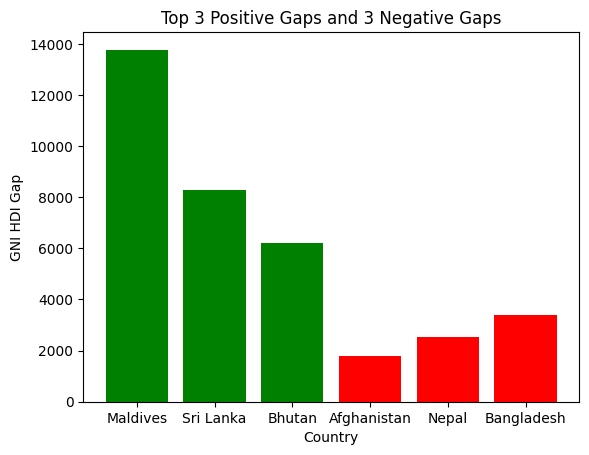

In [592]:
# Create a new metric: GNI HDI Gap = "gross inc percap" − "hdi"
hdi_south_asia_mean = hdi_south_asia_df.groupby("country")[["gross_inc_percap", "hdi"]].mean()
hdi_south_asia_mean['GNI_HDI_GAP'] = hdi_south_asia_mean['gross_inc_percap'] - hdi_south_asia_mean['hdi']
print(hdi_south_asia_mean['GNI_HDI_GAP'])

# Rank South Asian countries by GNI HDI Gap in descending order
gap_desc = hdi_south_asia_mean.sort_values(by='GNI_HDI_GAP', ascending=False).reset_index()
print("\nGap in Descending Order")
print(gap_desc[['country','GNI_HDI_GAP']])

# Rank South Asian countries by GNI HDI Gap in ascending order
gap_asc = hdi_south_asia_mean.sort_values(by='GNI_HDI_GAP', ascending=True).reset_index()
print("\nGap in Ascending Order")
print(gap_asc[['country','GNI_HDI_GAP']])
#top 3 positive gaps and top 3 negative gaps
positive_gap = gap_desc.head(3)
negative_gap = gap_asc.head(3)
plt.bar(positive_gap['country'],positive_gap['GNI_HDI_GAP'], color='green')
plt.bar(negative_gap['country'],negative_gap['GNI_HDI_GAP'],color='red')
plt.title("Top 3 Positive Gaps and 3 Negative Gaps")
plt.xlabel("Country")
plt.ylabel("GNI HDI Gap")
plt.savefig("bargraph4.png")
plt.show()

Ans:The GNI–HDI gap measures how much a country’s income level differs from its human development outcome. As shown, the biggest positive gaps are seen in Maldives, Sri Lanka, and Bhutan, indicating a higher per capita income compared to their HDI values.In other words,higher income does not always translate proportionally into better health, education, or overall human development.The smallest gaps are seen in Afghanistan, Nepal, and Bangladesh, indicating that their HDI levels are closer to their income levels, despite their generally low levels.Overall, the gap highlights that economic growth alone is not sufficient; effective investment in social sectors is essential to convert income into improved human development.

Problem 3
Comparative Regional Analysis: South Asia vs Middle East
1. Create Middle East Subset:

• Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].

• Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.

• Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.


In [593]:
#Task1 : Creating Middle East Subset
import pandas as pd

# Loading the Problem 1B dataset
hdi_2020_2022_df = pd.read_csv('/content/HDI_problem1B.csv')

# Defining list of Middle East Countries
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Step 3: Filter subsets
hdi_south_asia_2020_2022 = hdi_2020_2022_df[hdi_2020_2022_df['country'].isin(south_asia_countries)].copy()
hdi_middle_east_2020_2022 = hdi_2020_2022_df[hdi_2020_2022_df['country'].isin(middle_east_countries)].copy()

# Step 4: Save subsets as CSV
hdi_south_asia_2020_2022.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)
hdi_middle_east_2020_2022.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)


2. Descriptive Statistics:

• Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.

• Identify which region performs better on average.

In [594]:
#Task 2 : Descriptive Statistics
import pandas as pd

# Computing mean and standard deviation of HDI for South Asia
mean_south_asia = hdi_south_asia_2020_2022['hdi'].mean()
std_south_asia = hdi_south_asia_2020_2022['hdi'].std()

# Computing mean and standard deviation of HDI for Middle East
mean_middle_east = hdi_middle_east_2020_2022['hdi'].mean()
std_middle_east = hdi_middle_east_2020_2022['hdi'].std()

# Print results
print("South Asia HDI - Mean:", mean_south_asia, ", Std Dev:", std_south_asia)
print("Middle East HDI - Mean:", mean_middle_east, ", Std Dev:", std_middle_east)

# Comparing which region performs better on average
if mean_middle_east > mean_south_asia:
    better_region = "Middle East"
else:
    better_region = "South Asia"

print(f"{better_region} performs better on average based on mean HDI (2020–2022).")

South Asia HDI - Mean: 0.6395833333333333 , Std Dev: 0.09827331747496995
Middle East HDI - Mean: 0.7889090909090909 , Std Dev: 0.14129476362297624
Middle East performs better on average based on mean HDI (2020–2022).


ans:Middle East perform better on average

3.Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on HDI.

• Create a bar chart comparing these top and bottom performers across the two regions

South Asia Top 3:
 country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64

South Asia Bottom 3:
 country
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64

Middle East Top 3:
 country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64

Middle East Bottom 3:
 country
Lebanon    0.730000
Iraq       0.667000
Yemen      0.426333
Name: hdi, dtype: float64


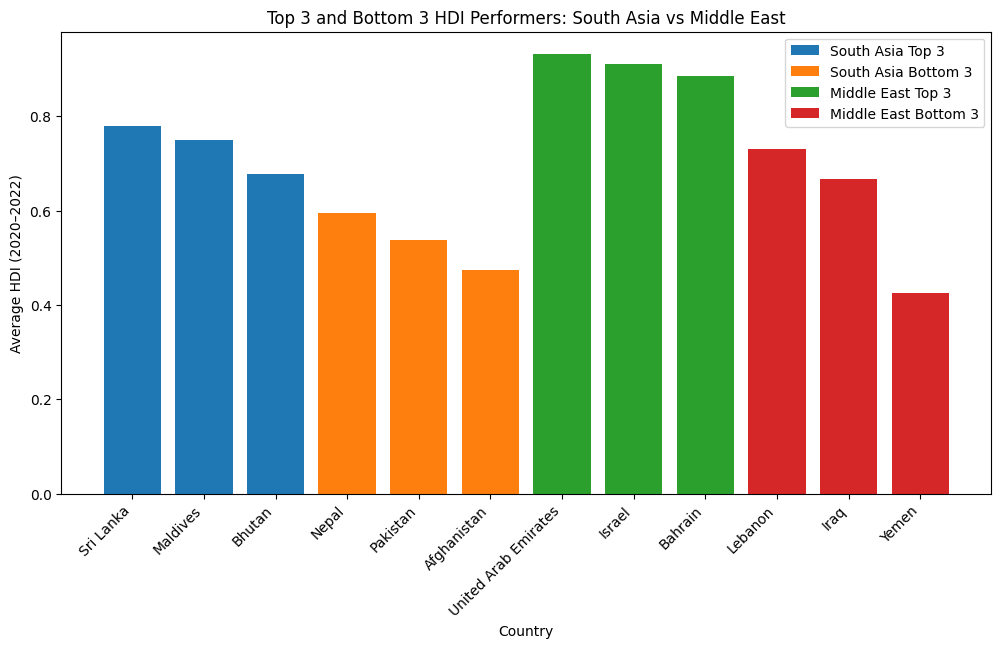

In [595]:
#Task3 :Top and Bottom Perfomers
import matplotlib.pyplot as plt

# Average HDI (2020–2022) for each country
south_asia_avg = hdi_south_asia_2020_2022.groupby('country')['hdi'].mean().sort_values(ascending=False)
middle_east_avg = hdi_middle_east_2020_2022.groupby('country')['hdi'].mean().sort_values(ascending=False)

# Top 3 and Bottom 3
#South Asia
sa_top3 = south_asia_avg.head(3)
print("South Asia Top 3:\n", sa_top3)
sa_bottom3 = south_asia_avg.tail(3)
print("\nSouth Asia Bottom 3:\n", sa_bottom3)

#Middle East
me_top3 = middle_east_avg.head(3)
print("\nMiddle East Top 3:\n", me_top3)
me_bottom3 = middle_east_avg.tail(3)
print("\nMiddle East Bottom 3:\n", me_bottom3)

# Plotting
plt.figure(figsize=(12,6))

# South Asia
top3 = sa_top3.head(3)
bottom3 = sa_bottom3.head(3)
plt.bar(top3.index, top3.values, label="South Asia Top 3")
plt.bar(bottom3.index, bottom3.values, label="South Asia Bottom 3")

# Middle East
top3 = me_top3.head(3)
bottom3 = me_bottom3.head(3)
plt.bar(top3.index, top3.values, label="Middle East Top 3")
plt.bar(bottom3.index, bottom3.values, label="Middle East Bottom 3")

plt.xlabel("Country")
plt.ylabel("Average HDI (2020–2022)")
plt.title("Top 3 and Bottom 3 HDI Performers: South Asia vs Middle East")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.savefig("bargraph5.png")
plt.show()


4. Metric Comparisons:
• Compare the following metrics across regions using grouped bar charts:
– Gender Development Index {"gender development"}
– Life Expectancy Index {"life expectancy"}
– GNI per Capita Index {"gross inc percap"}
• Identify which metric shows the greatest disparity between regions.


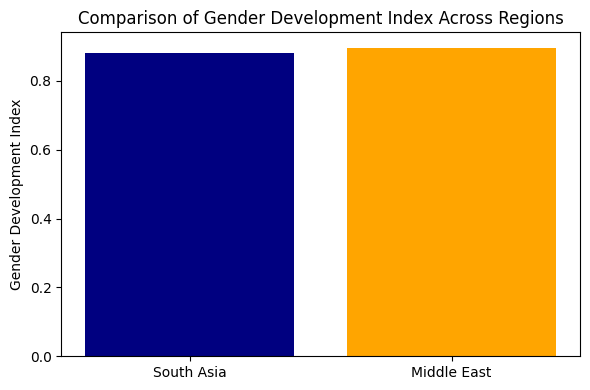

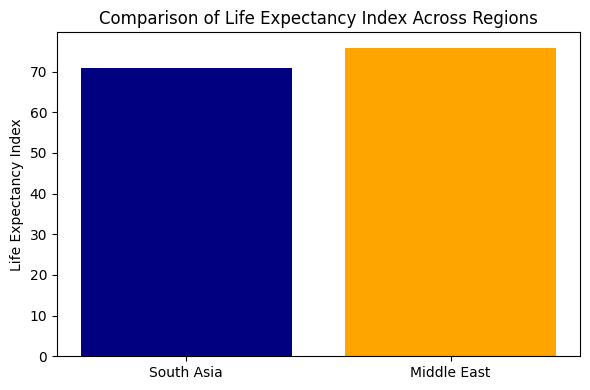

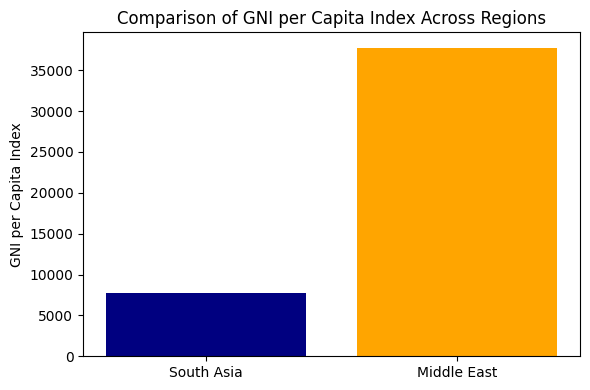

In [596]:
# Task 4 : Metric Comparisons

import matplotlib.pyplot as plt

# Metrics and labels
metrics = [
    ('gender_development', 'Gender Development Index'),
    ('life_expectancy', 'Life Expectancy Index'),
    ('gross_inc_percap', 'GNI per Capita Index')
]

# Loop through each metric and plot separately
for metric, label in metrics:

    # Compute mean values
    sa_value = hdi_south_asia_2020_2022[metric].mean()
    me_value = hdi_middle_east_2020_2022[metric].mean()

    # Create bar chart
    plt.figure(figsize=(6,4))
    plt.bar(['South Asia', 'Middle East'], [sa_value, me_value], color = ['navy','orange'])

    plt.ylabel(label)
    plt.title(f'Comparison of {label} Across Regions')
    plt.tight_layout()
    plt.savefig("barchart3.png")

    plt.show()

The Gender Development Index is slightly higher in the Middle East than in South Asia, showing a small regional difference. The Life Expectancy Index is also higher in the Middle East, but the gap is moderate. The GNI per Capita Index shows the greatest disparity, with the Middle East having a much higher value than South Asia, indicating a large difference in income levels between the two regions.

5. HDI Disparity:
• Compute the range (max – min) of HDI for each region.
• Compute the coefficient of variation (CV = std/mean) for HDI
• Identify which region exhibits more variation in HDI.


In [597]:
#Task 5 : HDI Disparity
import pandas as pd

# HDI statistics for South Asia
sa_mean = hdi_south_asia_2020_2022['hdi'].mean()
sa_std = hdi_south_asia_2020_2022['hdi'].std()
sa_max = hdi_south_asia_2020_2022['hdi'].max()
sa_min = hdi_south_asia_2020_2022['hdi'].min()

sa_range = sa_max - sa_min
sa_cv = sa_std / sa_mean

# HDI statistics for Middle East
me_mean = hdi_middle_east_2020_2022['hdi'].mean()
me_std = hdi_middle_east_2020_2022['hdi'].std()
me_max = hdi_middle_east_2020_2022['hdi'].max()
me_min = hdi_middle_east_2020_2022['hdi'].min()

me_range = me_max - me_min
me_cv = me_std / me_mean

# Print results
print("South Asia HDI Range:", sa_range)
print("South Asia HDI Coefficient of Variation (CV):", sa_cv)

print("\nMiddle East HDI Range:", me_range)
print("Middle East HDI Coefficient of Variation (CV):", me_cv)


South Asia HDI Range: 0.321
South Asia HDI Coefficient of Variation (CV): 0.1536520924690084

Middle East HDI Range: 0.5130000000000001
Middle East HDI Coefficient of Variation (CV): 0.17910145193048382


The Middle East exhibits more variation in HDI than South Asia.

6. Correlation Analysis:
• For each region, compute correlations of HDI with:
– Gender Development Index
– Life Expectancy Index
• Create scatter plots with trendlines for each correlation.
• Interpret the strength and direction of these relationships.


South Asia HDI vs Gender Development Correlation: 0.8742177004831327
South Asia HDI vs Life Expectancy Correlation: 0.9387641385416623


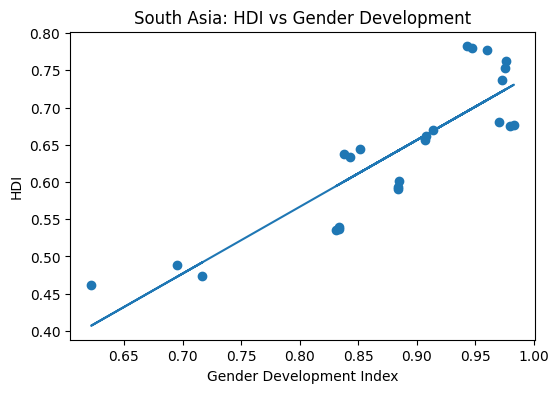

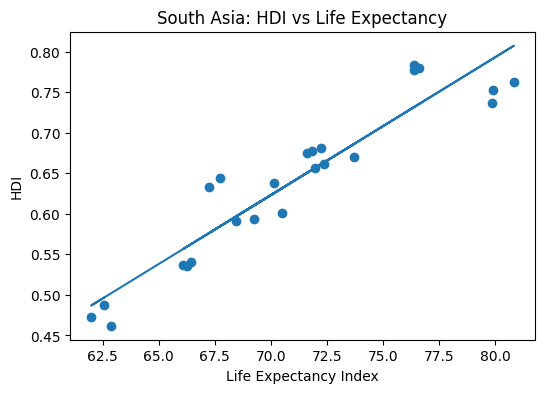


Middle East HDI vs Gender Development Correlation: 0.9356697525724119
Middle East HDI vs Life Expectancy Correlation: 0.9331227568940162


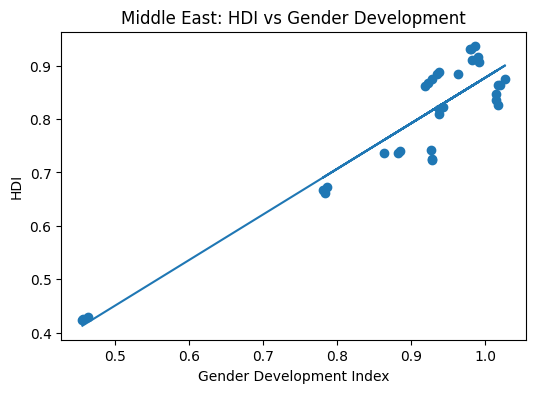

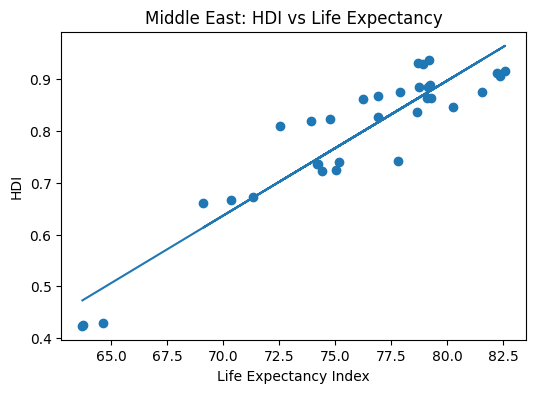

In [598]:
#Task6: Correlation Analysis
import numpy as np
import matplotlib.pyplot as plt

# SOUTH ASIA

# Correlations
sa_corr_gender = hdi_south_asia_2020_2022['hdi'].corr(
    hdi_south_asia_2020_2022['gender_development']
)
sa_corr_life = hdi_south_asia_2020_2022['hdi'].corr(
    hdi_south_asia_2020_2022['life_expectancy']
)

print("South Asia HDI vs Gender Development Correlation:", sa_corr_gender)
print("South Asia HDI vs Life Expectancy Correlation:", sa_corr_life)

# Scatter + trendline (Gender Development)
x = hdi_south_asia_2020_2022['gender_development']
y = hdi_south_asia_2020_2022['hdi']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Gender Development")
plt.show()

# Scatter + trendline (Life Expectancy)
x = hdi_south_asia_2020_2022['life_expectancy']
y = hdi_south_asia_2020_2022['hdi']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Life Expectancy")
plt.show()


#  MIDDLE EAST

# Correlations
me_corr_gender = hdi_middle_east_2020_2022['hdi'].corr(
    hdi_middle_east_2020_2022['gender_development']
)
me_corr_life = hdi_middle_east_2020_2022['hdi'].corr(
    hdi_middle_east_2020_2022['life_expectancy']
)

print("\nMiddle East HDI vs Gender Development Correlation:", me_corr_gender)
print("Middle East HDI vs Life Expectancy Correlation:", me_corr_life)

# Scatter + trendline (Gender Development)
x = hdi_middle_east_2020_2022['gender_development']
y = hdi_middle_east_2020_2022['hdi']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs Gender Development")
plt.show()

# Scatter + trendline (Life Expectancy)
x = hdi_middle_east_2020_2022['life_expectancy']
y = hdi_middle_east_2020_2022['hdi']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs Life Expectancy")
plt.show()


7. Outlier Detection:
• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.
• Create scatter plots highlighting outliers in a different color.
• Discuss the significance of these outliers.


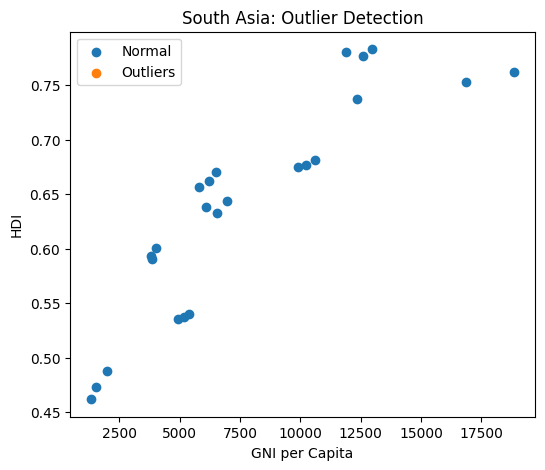

South Asia Outliers:
Empty DataFrame
Columns: [country, hdi, gross_inc_percap]
Index: []


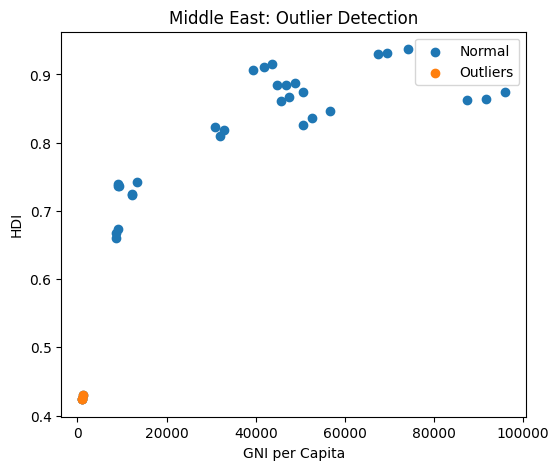


Middle East Outliers:
    country    hdi  gross_inc_percap
576   Yemen  0.430       1152.015672
577   Yemen  0.425       1112.162989
578   Yemen  0.424       1105.763435


In [599]:
#Task7 : Outlier Detection
import matplotlib.pyplot as plt

def detect_outliers_iqr(df, hdi_col='hdi', gni_col='gross_inc_percap'):
    # HDI IQR
    Q1_hdi = df[hdi_col].quantile(0.25)
    Q3_hdi = df[hdi_col].quantile(0.75)
    IQR_hdi = Q3_hdi - Q1_hdi

    hdi_outliers = (df[hdi_col] < Q1_hdi - 1.5*IQR_hdi) | \
                   (df[hdi_col] > Q3_hdi + 1.5*IQR_hdi)

    # GNI IQR
    Q1_gni = df[gni_col].quantile(0.25)
    Q3_gni = df[gni_col].quantile(0.75)
    IQR_gni = Q3_gni - Q1_gni

    gni_outliers = (df[gni_col] < Q1_gni - 1.5*IQR_gni) | \
                   (df[gni_col] > Q3_gni + 1.5*IQR_gni)

    return hdi_outliers | gni_outliers


# SOUTH ASIA
sa_outliers = detect_outliers_iqr(hdi_south_asia_2020_2022)

plt.figure(figsize=(6,5))
plt.scatter(hdi_south_asia_2020_2022['gross_inc_percap'],
            hdi_south_asia_2020_2022['hdi'], label='Normal')
plt.scatter(hdi_south_asia_2020_2022.loc[sa_outliers, 'gross_inc_percap'],
            hdi_south_asia_2020_2022.loc[sa_outliers, 'hdi'],
            label='Outliers')
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: Outlier Detection")
plt.legend()
plt.show()

print("South Asia Outliers:")
print(hdi_south_asia_2020_2022.loc[sa_outliers, ['country', 'hdi', 'gross_inc_percap']])


# MIDDLE EAST
me_outliers = detect_outliers_iqr(hdi_middle_east_2020_2022)

plt.figure(figsize=(6,5))
plt.scatter(hdi_middle_east_2020_2022['gross_inc_percap'],
            hdi_middle_east_2020_2022['hdi'], label='Normal')
plt.scatter(hdi_middle_east_2020_2022.loc[me_outliers, 'gross_inc_percap'],
            hdi_middle_east_2020_2022.loc[me_outliers, 'hdi'],
            label='Outliers')
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: Outlier Detection")
plt.legend()
plt.show()

print("\nMiddle East Outliers:")
print(hdi_middle_east_2020_2022.loc[me_outliers, ['country', 'hdi', 'gross_inc_percap']])


In South Asia, no outliers are detected using the 1.5×IQR rule, indicating that countries in this region have relatively similar levels of HDI and GNI per capita.This could indicate more uniform development patterns within South Asia over the period analyzed, although overall levels of development may well remain lower compared to other regions.

In the Middle East, Yemen is an outlier because it has much lower HDI and GNI per capita than other countries in the region. This shows that conflict and economic instability have seriously affected living standards and human development, making Yemen very different from the rest of the Middle East.